# Web Scraping Exercices
___

### Imports

In [1]:
import os 
import requests
from bs4 import BeautifulSoup


### Classes

## - Exercici 1

Realitza web scraping de dues de les tres pàgines web proposades utilitzant BeautifulSoup primer i Selenium després. 

- http://quotes.toscrape.com

- https://www.bolsamadrid.es

- www.wikipedia.es (fes alguna cerca primer i escrapeja algun contingut)

## Using **Beautiful Soup**



- A) Web scraping quotes webpage

>Here, we'll get the quote, the author and the Keywords/Tags associated, basicallly in the same way it was displayed int the website.

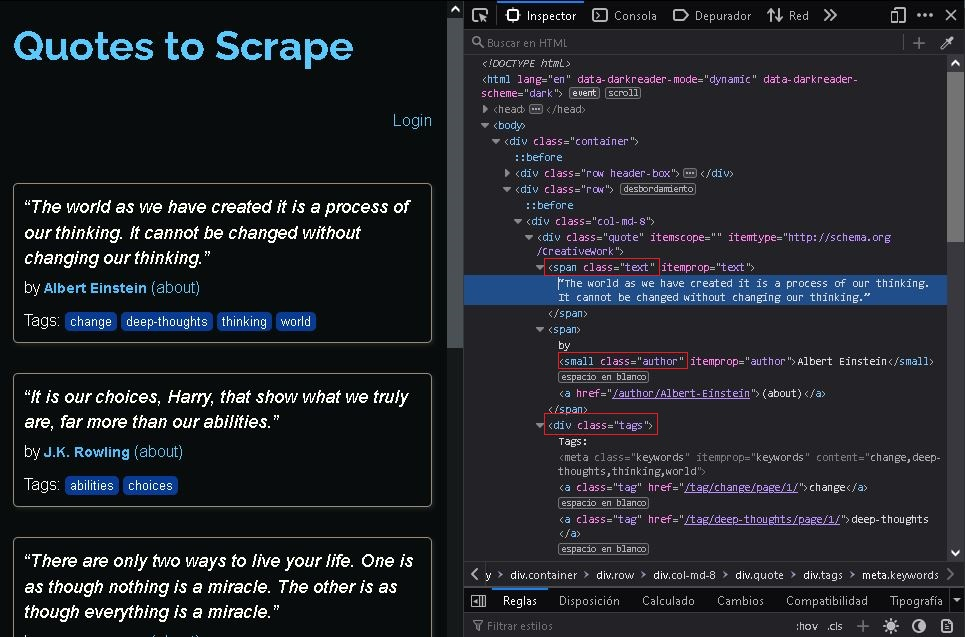

In [2]:
URL = "http://quotes.toscrape.com"
page = requests.get(URL)

# Check webpage HTML structure 
print(page.text)

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    

<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
        <span>by <small class="author" itempr

In [3]:
soup = BeautifulSoup(page.content, 'html.parser')
results = soup.find(class_='container')
print(results)

<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
<

In [4]:
quote_elements = results.find_all('div', class_='quote', itemscope="")
for x in quote_elements:
    quote = x.find('span', class_='text')
    author = x.find('small', class_='author')
    tags = x.find('div', class_='tags')
    print('\n', quote.text.strip())
    print(author.text.strip())
    print(tags.text.strip().replace('\n', ' '), '\n')
 
    
    



 “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Albert Einstein
Tags:              change deep-thoughts thinking world 


 “It is our choices, Harry, that show what we truly are, far more than our abilities.”
J.K. Rowling
Tags:              abilities choices 


 “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Albert Einstein
Tags:              inspirational life live miracle miracles 


 “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Jane Austen
Tags:              aliteracy books classic humor 


 “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Marilyn Monroe
Tags:              be-yourself inspirational 


 “Try not to become a man of success. Rather become a man of value.”
Albert Einstein
Tags:              adulth

- B) Web scraping Madrid's stock exchange webpage

>In this case since it's a more interactive web we'll just focuse on the news panel and the press releases and articles displayed.

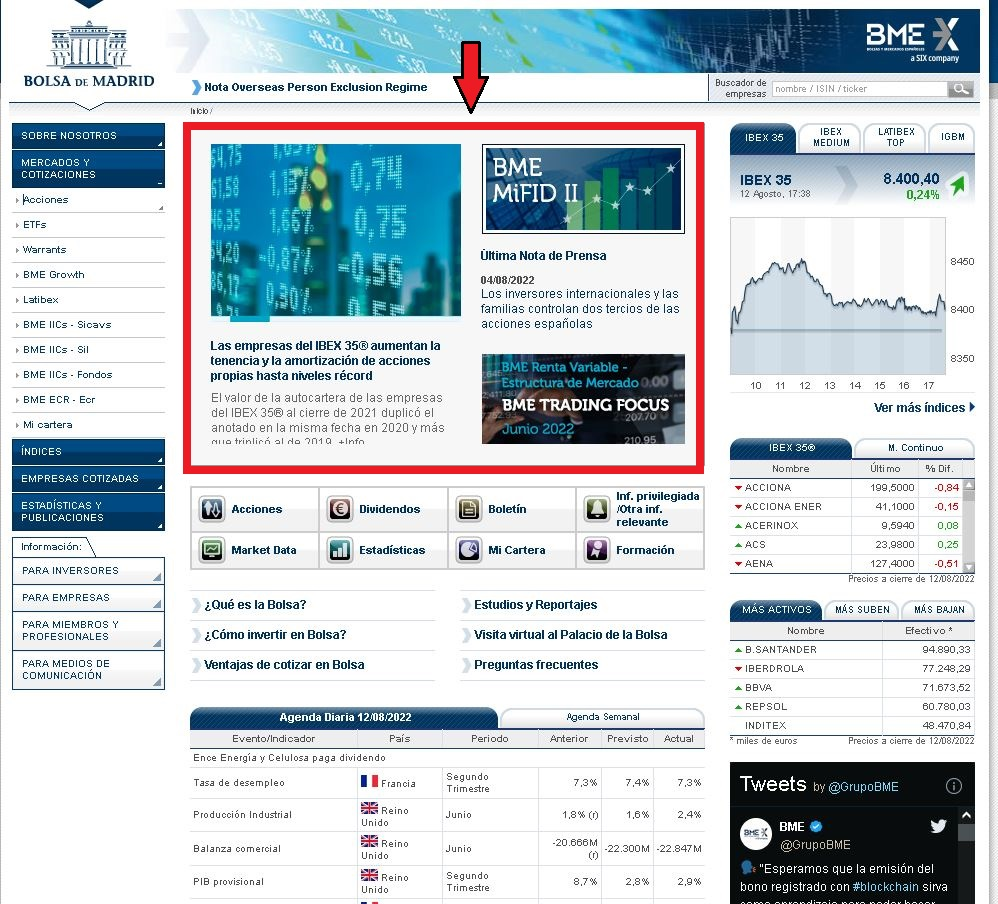

In [5]:
URL = "https://www.bolsamadrid.es"
page = requests.get(URL)

# Check webpage HTML structure 
print(page.text)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head data-idioma="esp" data-hora-act="Sun, 02 Oct 2022 14:46:22 GMT" data-app-path="/" data-bolsa="BMadrid" data-analytics-id="UA-35966870-2"><meta http-equiv="X-UA-Compatible" content="IE=11" /><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><meta id="ctl00_copyright" name="copyright" content="Copyright © BME 2022" /><title>
	Bolsa de Madrid
</title><link id="ctl00_RSSLink1" rel="alternate" type="application/rss+xml" href="/esp/aspx/RSS/RSS.ashx?feed=Todo" title="Bolsa de Madrid: Todos los contenidos agregados" /><link id="ctl00_RSSLink2" rel="alternate" type="application/rss+xml" href="/esp/aspx/RSS/RSS.ashx?feed=NotasPrensa" title="Bolsa de Madrid: Notas de Prensa" /><link id="ctl00_RSSLink3" rel="alternate" type="application/rss+xml" href="/esp/aspx/RSS/RSS.ashx?feed=Regulacion" title="Bolsa de M

In [6]:
# look-up for the panel news id
soup = BeautifulSoup(page.content, 'html.parser')
results = soup.find(id ='PortBolsa')
print(results.prettify())

<div id="PortBolsa">
 <div class="coln1">
  <div class="CuadroSlides" style="width:250px;height:180px;">
   <div class="mclick" data-labelga="banner BM Agenda  Día de la Educación Financiera 19-09-2022" data-slidetiempo="25000" data-valuega="1">
    <a href="http://publicaciones.bolsasymercados.es/mail/DiaEducacionFinanciera/2022/BME_STD_Agenda_ToqueCampana_DiaEducFinan-oct22_Barcelona.html" target="_blank">
     <div align="center">
      <img border="0" src="/aspx/Imagen.ashx?num=6230"/>
     </div>
    </a>
   </div>
   <div class="mclick" data-labelga="banner BM PDF Informe Propiedad Acciones cotizadas 2022 05-08-2022" data-slidetiempo="25000" data-valuega="1" style="display:none;">
    <a href="https://www.bolsasymercados.es/docs/BME/docsSubidos/Informe-Propiedad-de-las-Acciones-cotizadas.pdf" target="_blank">
     <div align="center">
      <img border="0" src="/aspx/Imagen.ashx?num=6226"/>
     </div>
    </a>
   </div>
   <div class="mclick" data-labelga="banner BM PDF Autocart

In [7]:
# get desired news only
money_news = results.find_all('div', class_='mclick')
for x in money_news:
    article = x.find('a')
    if len(article.text) != 0:
        print(article.text, '\n')


Día de la Educación FinancieraUn año más, BME tiene el placer de invitarle al Toque de Campana del Día de la Educación Financiera, que se celebrará el próximo 3 de octubre en la Bolsa de Barcelona. +Info 

Informe sobre la Propiedad de las Acciones cotizadasLa participación de los no residentes en la propiedad de las cotizadas baja un punto porcentual hasta el 48,8% y la de las familias se mantiene en el 17,1%. +Info 

Las empresas del IBEX 35® aumentan la tenencia y la amortización de acciones propias hasta niveles récordEl valor de la autocartera de las empresas del IBEX 35® al cierre de 2021 duplicó el anotado en la misma fecha en 2020 y más que triplicó al de 2019. +Info 

La Bolsa de Madrid, Patrimonio MundialLa Unesco ha declarado como Patrimonio Mundial el eje Paseo del Prado y Parque del Retiro, donde se sitúa el Palacio de la Bolsa de Madrid, sede de BME. + Info
 

Visita Virtual al Palacio de la BolsaDisfruta una experiencia interactiva en la que podrás recorrer las diferente

## Using Selenium

- A) Webscraping Quotes

In [44]:
import unittest
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By


browser = webdriver.Firefox()
browser.get("http://quotes.toscrape.com")


results = browser.find_elements(By.CLASS_NAME,'quote')
for value in results:
    print('\n', value.text)

browser.close()


 “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
by Albert Einstein (about)
Tags: change deep-thoughts thinking world

 “It is our choices, Harry, that show what we truly are, far more than our abilities.”
by J.K. Rowling (about)
Tags: abilities choices

 “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
by Albert Einstein (about)
Tags: inspirational life live miracle miracles

 “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
by Jane Austen (about)
Tags: aliteracy books classic humor

 “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
by Marilyn Monroe (about)
Tags: be-yourself inspirational

 “Try not to become a man of success. Rather become a man of value.”
by Albert Einstein (about)
Tags: adulthood success value

 “I

- B) Bolsa Madrid

In [47]:
browser = webdriver.Firefox()
browser.get("http://www.bolsamadrid.es")


results = browser.find_elements(By.ID,'PortBolsa')
for value in results:
    print('\n', value.text)

browser.close()


 Toque de Campana por la Educación Financiera
La apertura de honor, celebrada en la Bolsa de Barcelona, y protagonizada por el Gobernador del Banco de España, Pablo Hernández de Cos, forma parte de la iniciativa Ring the Bell For Financial Literacy. +Info
Última Nota de Prensa
03/10/2022
La Bolsa negocia 24.198 millones de euros en septiembre


## - Exercici 2

Documenta en un Word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

Per saber més

A manera d'exemple del que es demana pots consultar aquest enllaç:

->https://www.kaggle.com/datasets/vivovinco/20212022-football-team-stats.


- Exercici 3

Tria una pàgina web que tu vulguis i realitza web scraping mitjançant la llibreria Selenium primer i Scrapy després. 

In [ ]:
import scrapy